In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [20]:
# Loading the dataset
file_path = "games-data.csv"
games_data = pd.read_csv(file_path)

# Handling  missing values in 'players'
games_data['players'] = games_data['players'].fillna('Unknown')

# Simplifying 'genre' by extracting the primary genre
games_data['primary_genre'] = games_data['genre'].apply(lambda x: x.split(',')[0])

#Encoding categorical features
label_encoders = {}
for column in ['platform', 'developer', 'primary_genre']:
    le = LabelEncoder()
    games_data[column] = le.fit_transform(games_data[column])
    label_encoders[column] = le

In [21]:
# Preparing features (X) and target (y)
features = ['platform', 'developer', 'score', 'user score', 'critics', 'users']
X = games_data[features]
y = games_data['primary_genre']

#Converting 'user score' to numeric type
X['user score'] = pd.to_numeric(X['user score'], errors='coerce')

#Handling missing values
X.fillna(X.mean(), inplace=True)

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<ipython-input-21-ce510d612ea2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['user score'] = pd.to_numeric(X['user score'], errors='coerce')
<ipython-input-21-ce510d612ea2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [22]:
#Building  the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoders['primary_genre'].classes_), activation='softmax')])

#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training  the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

#Evaluating  the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2910 - loss: 2.9057 - val_accuracy: 0.3360 - val_loss: 2.2032
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3335 - loss: 2.1645 - val_accuracy: 0.3394 - val_loss: 2.1807
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3391 - loss: 2.1165 - val_accuracy: 0.3435 - val_loss: 2.1677
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3471 - loss: 2.0991 - val_accuracy: 0.3427 - val_loss: 2.1520
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3401 - loss: 2.1046 - val_accuracy: 0.3405 - val_loss: 2.1437
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3438 - loss: 2.0880 - val_accuracy: 0.3413 - val_loss: 2.1397
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3500 - loss: 2.0696 - val_accuracy: 0.3399 - val_loss: 2.1337
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3415 - loss: 2.0774 - val_accuracy: 0.

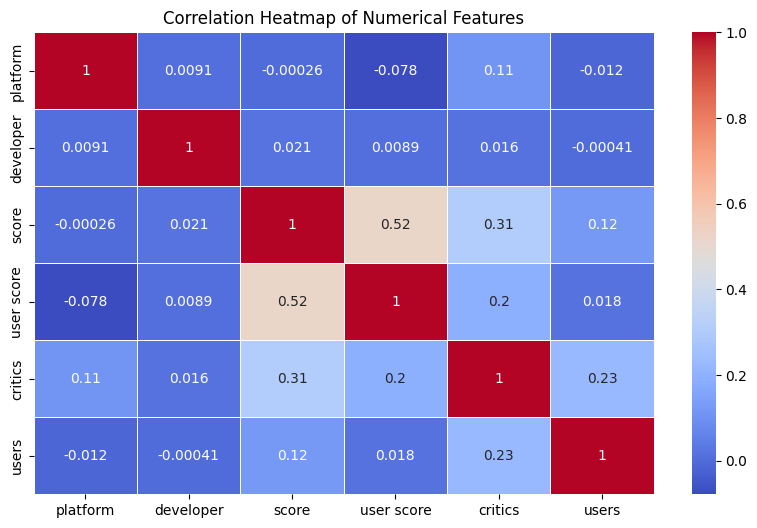

In [7]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

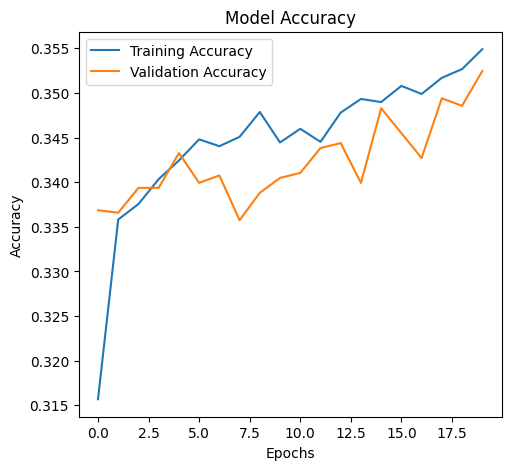

In [8]:
#Model Training Performance (Accuracy & Loss Curves)
plt.figure(figsize=(12, 5))

#Plotting the  Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

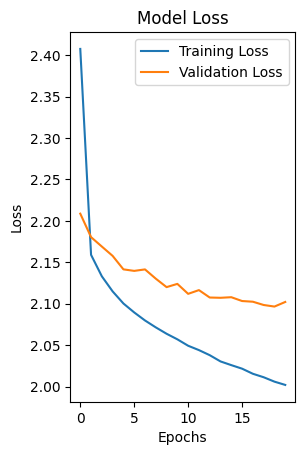

In [9]:
#Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
#Making predictions on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


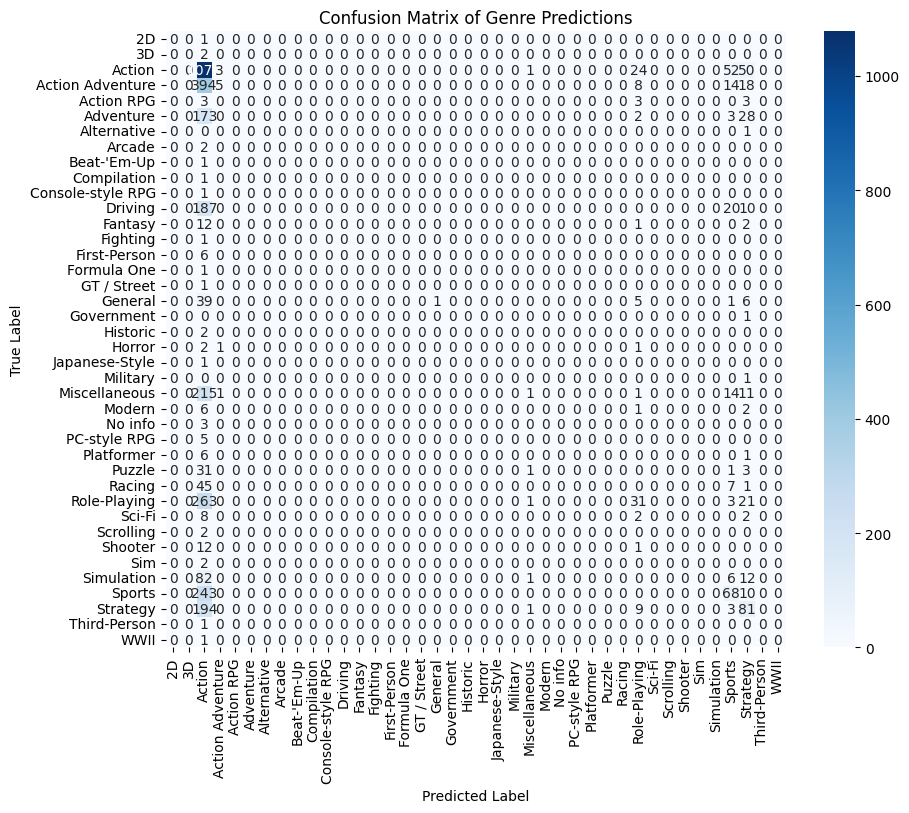

In [18]:
#Filtering the target names based on classes present in y_test
valid_classes = [label_encoders['primary_genre'].classes_[i] for i in np.unique(y_test)]

#Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_classes, yticklabels=valid_classes)
plt.title("Confusion Matrix of Genre Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
#Displaying some example predictions
example_indices = np.random.choice(len(X_test), 5, replace=False)
for idx in example_indices:
    predicted_genre = label_encoders['primary_genre'].inverse_transform([y_pred_labels[idx]])[0]
    actual_genre = label_encoders['primary_genre'].inverse_transform([y_test.iloc[idx]])[0]
    print(f"Example {idx + 1}: Predicted Genre = {predicted_genre}, Actual Genre = {actual_genre}")


Example 1143: Predicted Genre = Action, Actual Genre = Action
Example 1825: Predicted Genre = Action, Actual Genre = Strategy
Example 932: Predicted Genre = Action, Actual Genre = Adventure
Example 1452: Predicted Genre = Action, Actual Genre = Role-Playing
Example 1956: Predicted Genre = Action, Actual Genre = Simulation


In [ ]:
#Savivg the model
model.save("game_genre_classifier.h5")